## Basic imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
data_file = os.path.abspath(os.path.join(os.getcwd(), 'data', 'ndc_talks_manually_fixed.csv'))

## Load data

In [3]:
df = pd.read_csv(data_file)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Published          4112 non-null   object
 1   Type               4112 non-null   object
 2   Conference         4112 non-null   object
 3   Title              4112 non-null   object
 4   Speaker            4112 non-null   object
 5   Duration           4112 non-null   object
 6   DurationInMinutes  4112 non-null   int64 
 7   Link               4112 non-null   object
dtypes: int64(1), object(7)
memory usage: 257.1+ KB


In [5]:
df.head(5)

,Published,Type,Conference,Title,Speaker,Duration,DurationInMinutes,Link
0,2 days ago,talk,NDC Melbourne 2025,Who tests their cloud code anyway?,Lars Klint,58:27,58,https://youtube.com/watch?v=-bwSG_ys_4s
1,2 days ago,talk,NDC Melbourne 2025,Inside the Breach: Secrets Exposed,Troy Hunt,59:07,59,https://youtube.com/watch?v=Og-cFpwqjQ4
2,4 days ago,talk,NDC Melbourne 2025,"Keynote: The past, present, and future of AI f...",Steve Sanderson,59:12,59,https://youtube.com/watch?v=Xyios5mdkIM
3,4 days ago,talk,NDC Melbourne 2025,How Rome2Rio split up their monolith and moved...,Lachlan Barclay,43:03,43,https://youtube.com/watch?v=_8Vf_G8Lv-c&pp=0gc...
4,4 days ago,talk,NDC Melbourne 2025,"Mirror, mirror: LLMs and the illusion of humanity",Jodie Burchell,56:09,56,https://youtube.com/watch?v=RSS1a8ngGRU


In [6]:
df['Conference'].value_counts()

Conference
NDC Oslo 2017                  175
NDC Oslo 2018                  174
NDC Oslo 2019                  172
NDC London 2017                157
NDC Oslo 2023                  156
                              ... 
NDC Syndey 2021                  2
NDC Melbourne 2020               2
NDC Mini Copenhagen 2018         1
NDC Minnesota 2020               1
NDC Security Australia 2019      1
Name: count, Length: 67, dtype: int64

## Filter the talks

In [7]:
s = pd.to_numeric(df['DurationInMinutes'], errors="coerce").isna()

In [8]:
s[s == True]

Series([], Name: DurationInMinutes, dtype: bool)

In [9]:
talks = df[df.Type == 'talk']
oslo_talks = talks[talks.Conference.str.contains("NDC Oslo")]
oslo_talks = oslo_talks.query('`DurationInMinutes` < 75 & `DurationInMinutes` > 20')
oslo_talks['Conference'].value_counts()

Conference
NDC Oslo 2017    162
NDC Oslo 2018    159
NDC Oslo 2019    154
NDC Oslo 2023    140
NDC Oslo 2024    113
NDC Oslo 2022    113
NDC Oslo 2021    113
NDC Oslo 2020    112
NDC Oslo 2016     43
Name: count, dtype: int64

In [10]:
oslo_talks.shape

(1109, 8)

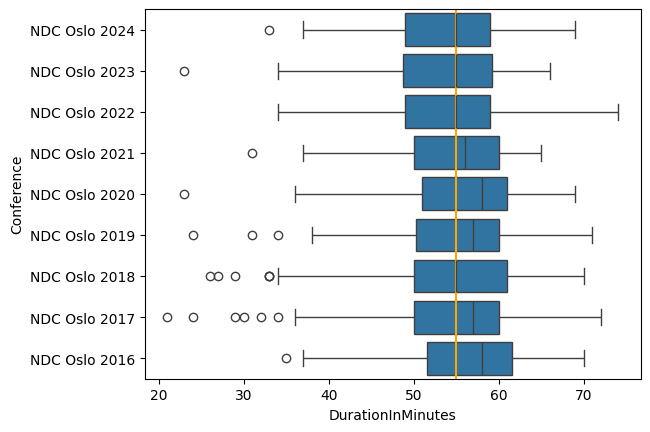

In [11]:
ax = sns.boxplot(oslo_talks, 
                 x='DurationInMinutes', 
                 y='Conference')
ax.axvline(x=55, color='orange')
plt.savefig('NDC_Oslo_talks_boxplot')

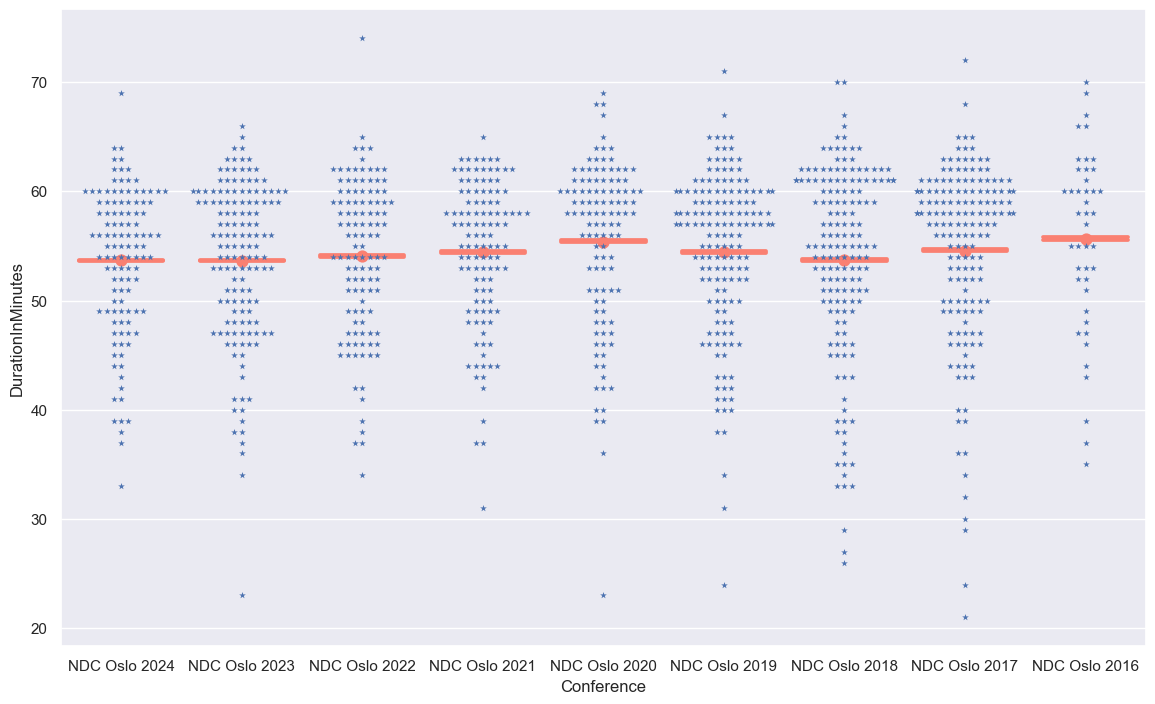

In [18]:
sns.set(rc={'figure.figsize':(14,8.27)})

spec = dict(x="Conference", 
            y="DurationInMinutes", 
            data=oslo_talks)

sns.swarmplot(**spec, marker="*")
sns.pointplot(**spec, 
              linestyle='none', 
              errorbar=('ci', 10), 
              capsize=0.7,
              color='salmon')

plt.savefig('NDC_Oslo_talks_swarmplot')
#plt.xticks(rotation=45, ha="right")
#https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot

In [13]:
group = oslo_talks.groupby(['Conference']).describe()
group.sort_values(by='Conference', ascending=False)

DurationInMinutes                                          \
                          count       mean       std   min    25%   50%   
Conference                                                                
NDC Oslo 2024             113.0  53.690265  6.798214  33.0  49.00  55.0   
NDC Oslo 2023             140.0  53.642857  7.419662  23.0  48.75  55.0   
NDC Oslo 2022             113.0  54.053097  7.146229  34.0  49.00  55.0   
NDC Oslo 2021             113.0  54.477876  6.693677  31.0  50.00  56.0   
NDC Oslo 2020             112.0  55.383929  7.822635  23.0  51.00  58.0   
NDC Oslo 2019             154.0  54.474026  7.557361  24.0  50.25  57.0   
NDC Oslo 2018             159.0  53.716981  8.954266  26.0  50.00  55.0   
NDC Oslo 2017             162.0  54.574074  8.403493  21.0  50.00  57.0   
NDC Oslo 2016              43.0  55.651163  8.374803  35.0  51.50  58.0   

                            
                 75%   max  
Conference                  
NDC Oslo 2024  59.00  69.0  
NDC Oslo 2023  59.25  66.0  
NDC Oslo 2022  59.00  74.0  
NDC Oslo 2021  60.00  65.0  
NDC Oslo 2020  61.00  69.0  
NDC Oslo 2019  60.00  71.0  
NDC Oslo 2018  61.00  70.0  
NDC Oslo 2017  60.00  72.0  
NDC Oslo 2016  61.50  70.0

In [22]:
oslo_talks.query('DurationInMinutes < 50')['Conference'].value_counts().sort_index(ascending=False)

Conference
NDC Oslo 2024    31
NDC Oslo 2023    38
NDC Oslo 2022    31
NDC Oslo 2021    26
NDC Oslo 2020    25
NDC Oslo 2019    34
NDC Oslo 2018    38
NDC Oslo 2017    37
NDC Oslo 2016    10
Name: count, dtype: int64